# Establish connection to MySQL

In [16]:
import matplotlib.pyplot as plt
import mysql.connector

In [20]:
# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="mYsT4nd4rdQu3rYL4ngu4g3",
    database="anime_database"
)

# Histogram of Anime Scores

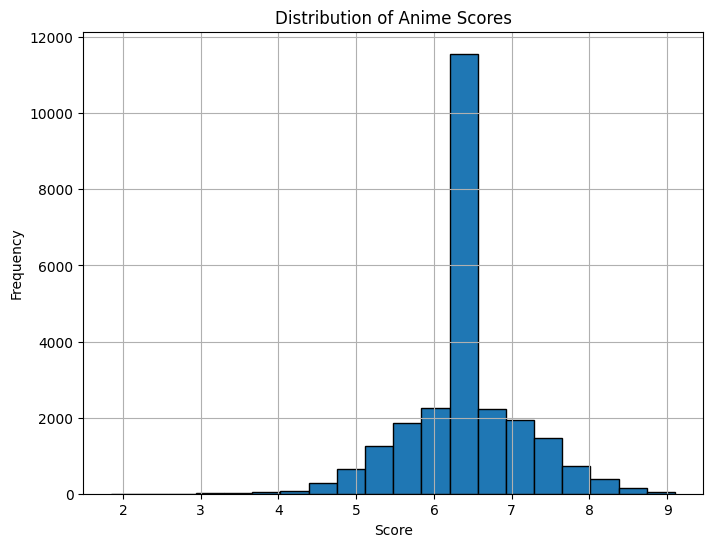

In [18]:
# Query to fetch anime scores
query_scores = "SELECT score FROM anime_data"

# Execute query
cursor = conn.cursor()
cursor.execute(query_scores)

# Fetch all scores
scores = cursor.fetchall()

# Close cursor and connection
cursor.close()
conn.close()

# Extract scores from result
scores = [score[0] for score in scores]

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(scores, bins=20, edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anime Scores')
plt.grid(True)
plt.show()

# Scatter Plot of Number of Episodes vs. Score

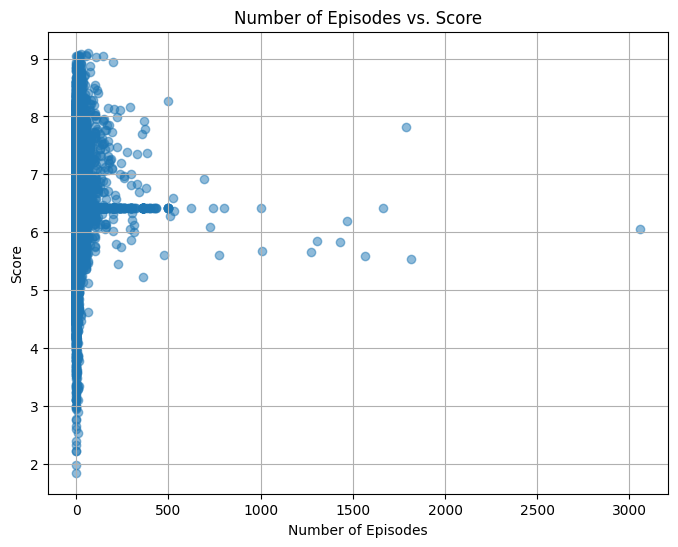

In [21]:
# Query to fetch number of episodes and scores
query_episodes_scores = "SELECT episodes, score FROM anime_data"

# Execute query
cursor = conn.cursor()
cursor.execute(query_episodes_scores)

# Fetch all data
data = cursor.fetchall()

# Close cursor and connection
cursor.close()
conn.close()

# Extract episodes and scores
episodes = [item[0] for item in data]
scores = [item[1] for item in data]

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(episodes, scores, alpha=0.5)
plt.xlabel('Number of Episodes')
plt.ylabel('Score')
plt.title('Number of Episodes vs. Score')
plt.grid(True)
plt.show()